# Cardio Good Fitness
 Cardio Good Fitness is a retail store and this data is  of customers who brought various treadmill models.
 

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file. The team identifies the following customer variables to study: product purchased, TM195, TM498, or TM798; gender; age, in years;education, in years; relationship status, single or partnered; annual household income ($); average number of times the customer plans to use the treadmill each week; average number of miles the customer expects to walk/run each week; and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape. Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

**Dataset Information** :


 cardiogoodfitness.csv: The csv contains data related to customers who have purchased different model from Cardio Good Fitness  :
- Product - the model no. of the treadmill
- Age - in no of years, of the customer
- Gender - of the customer
- Education - in no. of years, of the customer
- Marital Status - of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - of the customer
- Miles- expected to run

**Objective**
- Come up with a customer profile (characteristics of a customer) of the different products
- Based on the data we have to generate a set of insights and recommendations that will help the company in targetting new customers

**Questions to be answered**
 
 - How many models does store have?
 - Which is most sold Model?
 - Are Male customers buying treadmill more than female customers?
 - What is the Income ,Age , Education of people buying treadmill.?
 - How many days and miles customer expect to run on treadmill?
 - What is the self rated fitness of customers buying treadmill.?
 - Are married customer buying Treadmill more than Single customers?
 - Is there any relation between Income and model.?
 - Is there any relation between Age and model ?
 - Is there any relation between self rated fitness and model .?
 - Is there any relation between education and model.?
 - Does gender has any effect on model customer buy .?
 - Does Martial status has any effect model customer buy.? 
 - Is there different age groups buying different models.?
 - Relation between Age, Income and education and model bought ?

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('CardioGoodFitness.csv')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observation:** 
-  Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
- Maximum income of treadmill user is 100K ,  Average income approx. 54K ,while median is is approx. 51K.
- Expected Treadmill  usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
- Customer  education is between 12 -21 years, with average and median of 16 years and maximum of 21 years
- Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
- Average self rated fitness is 3.

In [5]:
# summary of sorted unique values per column
for col in data.columns:
    print('{} : {}'.format(col,sorted(data[col].unique())))

Product : ['TM195', 'TM498', 'TM798']
Age : [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50]
Gender : ['Female', 'Male']
Education : [12, 13, 14, 15, 16, 18, 20, 21]
MaritalStatus : ['Partnered', 'Single']
Usage : [2, 3, 4, 5, 6, 7]
Fitness : [1, 2, 3, 4, 5]
Income : [29562, 30699, 31836, 32973, 34110, 35247, 36384, 37521, 38658, 39795, 40932, 42069, 43206, 44343, 45480, 46617, 47754, 48556, 48658, 48891, 49801, 50028, 51165, 52290, 52291, 52302, 53439, 53536, 54576, 54781, 55713, 56850, 57271, 57987, 58516, 59124, 60261, 61006, 61398, 62251, 62535, 64741, 64809, 65220, 67083, 68220, 69721, 70966, 74701, 75946, 77191, 83416, 85906, 88396, 89641, 90886, 92131, 95508, 95866, 99601, 103336, 104581]
Miles : [21, 38, 42, 47, 53, 56, 64, 66, 74, 75, 80, 85, 94, 95, 100, 103, 106, 112, 113, 120, 127, 132, 140, 141, 150, 160, 169, 170, 180, 188, 200, 212, 240, 260, 280, 300, 360]


- It can be observed that there isn't any weird values or null values from the summary of the unique values per column function

## Data Preprocessing

In [6]:
# type convertion
category = ['Product', 'Gender', 'MaritalStatus']
for cat in category:
    data[cat] = data[cat].astype("category")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [7]:
#check for null values
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
#check for duplicated records (choose any of the codes below to find)
data.duplicated().any()
data.duplicated().sum()

0

## How many models does store have?


In [9]:
data.Product.unique()

['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798']

- Ans: there are only 3 models in store

## Which is most sold Model?


In [10]:
data.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

- Ans: TM195 is the most sold

## Are Male customers buying treadmill more than female customers?


In [11]:
data.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

- Ans: Yes more males are buying treadmill more than female customers

## Are married people buying the treadmill more than single users?

In [12]:
data.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

- Ans: It's observed that married users purchased more than single users

## What is the Income ,Age , Education of people buying treadmill.?


In [13]:
# descriptive stats of product TM195
data[data['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


<AxesSubplot:xlabel='Miles'>

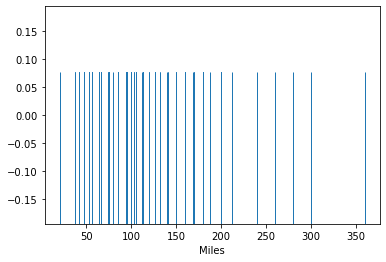

In [67]:
sns.rugplot(data['Miles'], height=0.7)

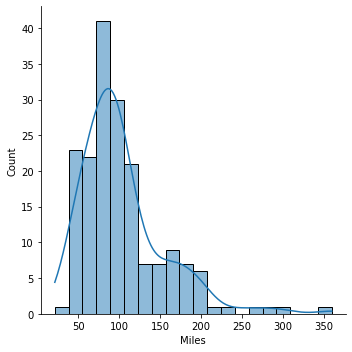

In [69]:
sns.displot(data=data, x='Miles',kde=True)

In [70]:
data.pivot_table(index='Income',columns='Age',values='Miles')

Age,18,19,20,21,22,23,24,25,26,27,...,40,41,42,43,44,45,46,47,48,50
Income,,,,,,,,,,,,,,,,,,,,,
29562,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30699,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31836,NaN,69.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32973,NaN,85.0,59.5,69.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34110,NaN,NaN,106.0,127.0,NaN,70.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,NaN
95866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
data[data.Age == 18]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112


**Observation**
- 80 people bought model TM195
- For age, the average is 28, median is 26 and mode is 50
- For education the average is 15 and median is 16 and mode is 18
- Average usage per week is 3
- For fitness the average is 3 median is 3 and mode is 5
- For income the average is 46k
- For miles the average is 82 per week and median of 85


In [14]:
# descriptive stats of product TM498
data[data['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


**Observation**
- 60 people bought model TM498
- For age, the average is 28, median is 26 and mode is 48
- For education the average is 15 and median is 16 and mode is 18
- Average usage per week is 3
- For fitness the average is 3 median is 3 and mode is 4
- For income the average is 48k
- For miles the average is 87 per week and median of 85


In [15]:
# descriptive stats of product TM798
data[data['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


**Observation**
- 40 people bought model TM798
- For age, the average is 29, median is 27 and mode is 48
- For education the average is 17 and median is 18 and mode is 21
- Average usage per week is 4
- For fitness the average is 4 median is 5 and mode is 5
- For income the average is 75k
- For miles the average is 166 per week and median of 160


##   Is there any relation between Income and model.?


In [16]:
df_corr = data.copy()

In [17]:
dcor = pd.get_dummies(data[category])


In [18]:
dcorr = pd.concat([data,dcor], axis=1)

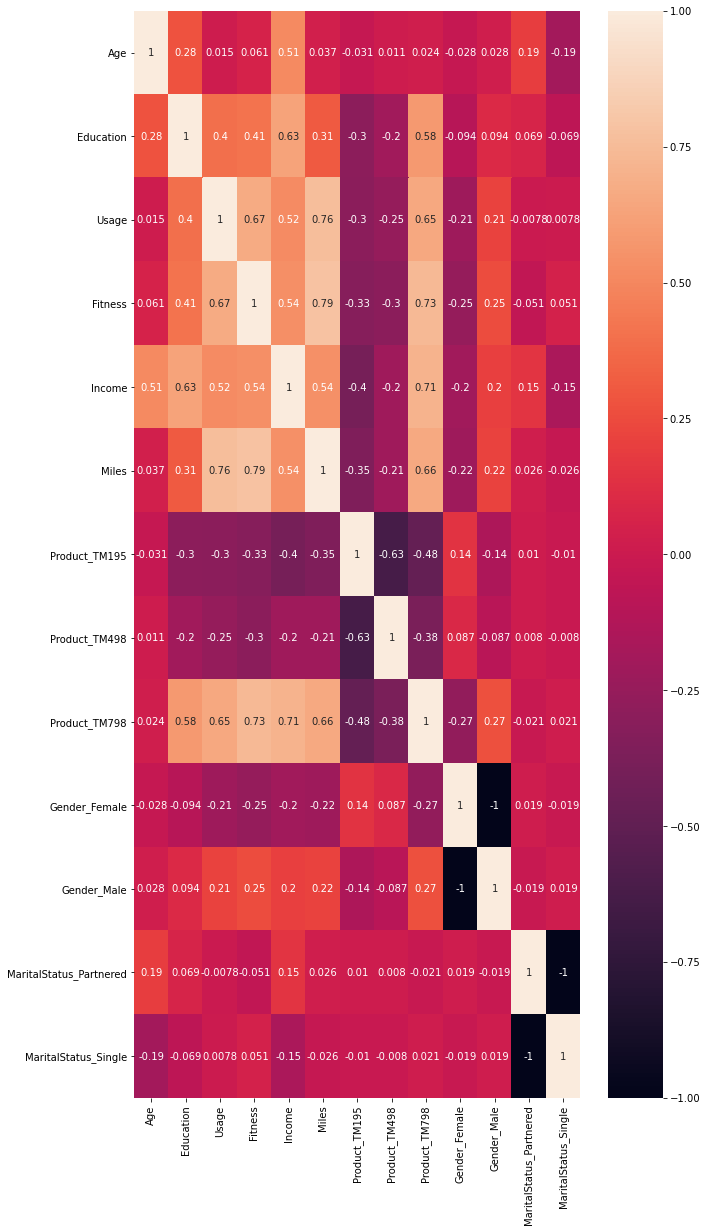

In [19]:
plt.figure(figsize=[10,20])
sns.heatmap(dcorr.corr(), annot=True);

<Figure size 360x360 with 0 Axes>

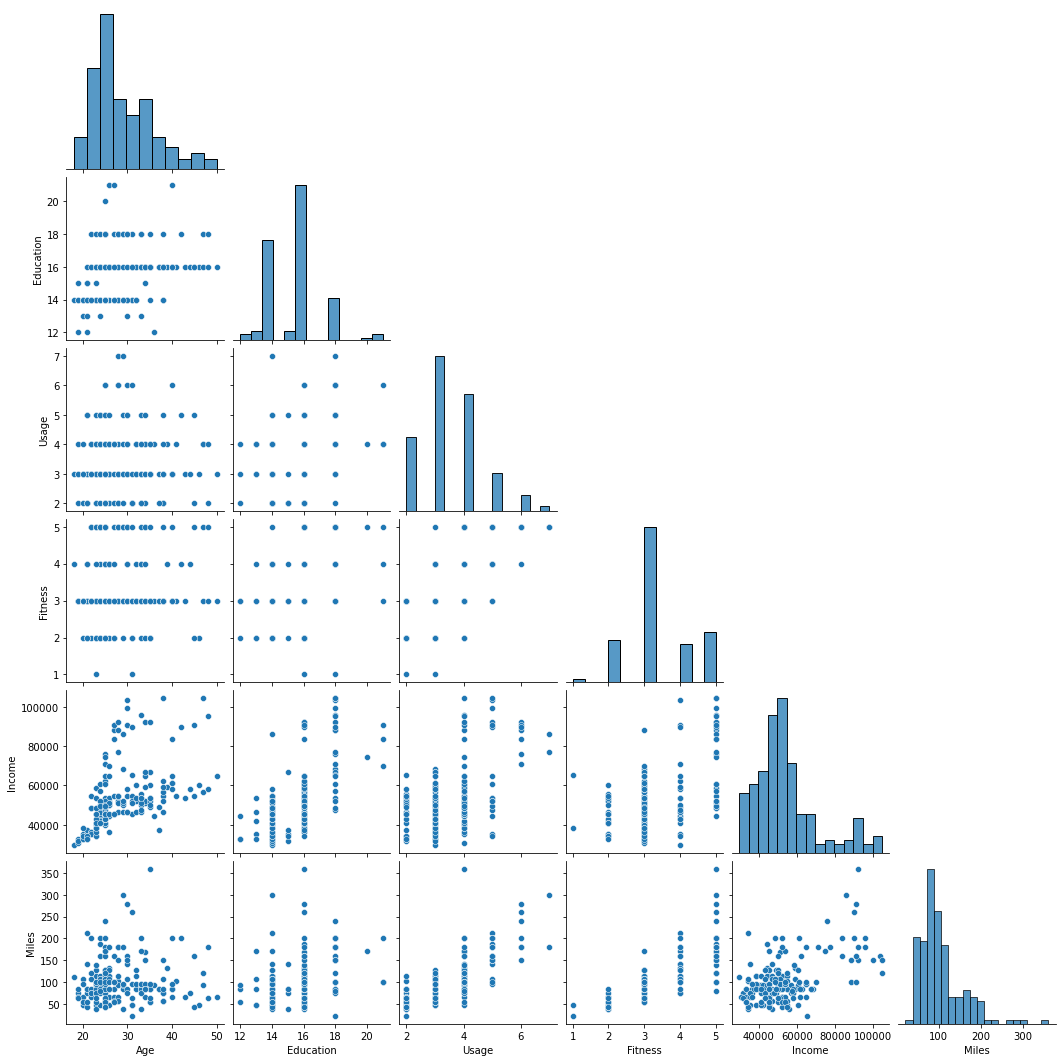

In [20]:
plt.figure(figsize=[5,5])
sns.pairplot(data, corner=True)

- From the heatmap it's observed that there is a positive correlation with income and model TM798
- There is not much correlation between Age and model
- There is a positive correlation between fitness and TM798
- There somewhat correlation between Education and TM798
- There is no correlation between Gender and model
- There is no correlation between Marital status and model
- There is correlation between model TM798 and Income, Education


## BiVariate Visualization


In [21]:
def dist_box_violin(data):
    
    Name = data.name
    fig, axes = plt.subplots(1,3,figsize=[17,7])
    fig.suptitle('Spread of Data for ' + Name, fontsize=14, fontweight='bold')
    sns.distplot(data, ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(data, ax=axes[1])
    sns.violinplot(data, ax=axes[2])
    

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

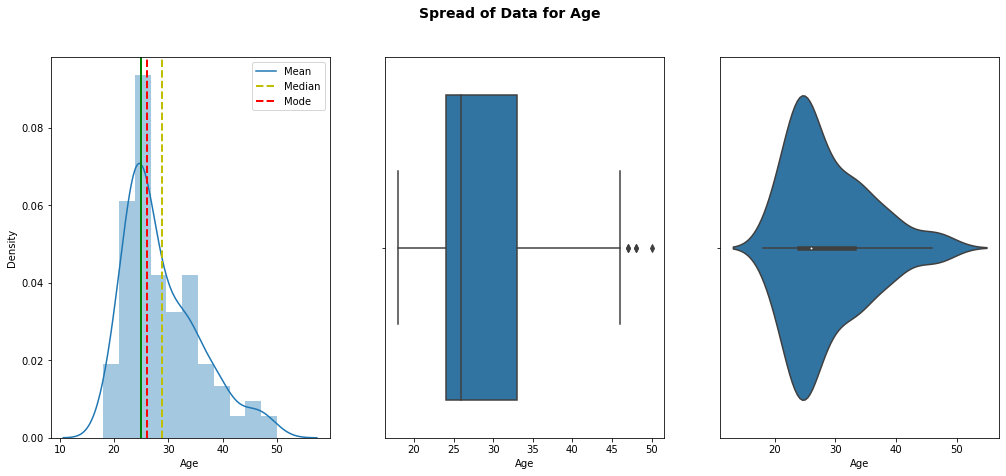

In [22]:
dist_box_violin(data.Age)

- Age is right skewed
- Customers buying the treadmill are younger in age between 25 and 35. With median of 26, avg of 28 
- Ages before 20 and after 40 are less

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

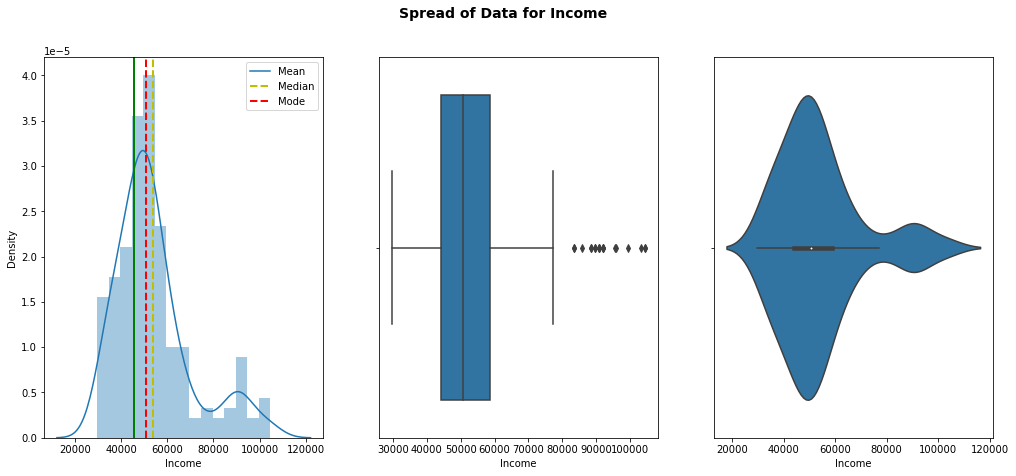

In [23]:
dist_box_violin(data.Income)

- Average is about 50k
- There are some outliers in income
- Most of the customers are in the lower pay range

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

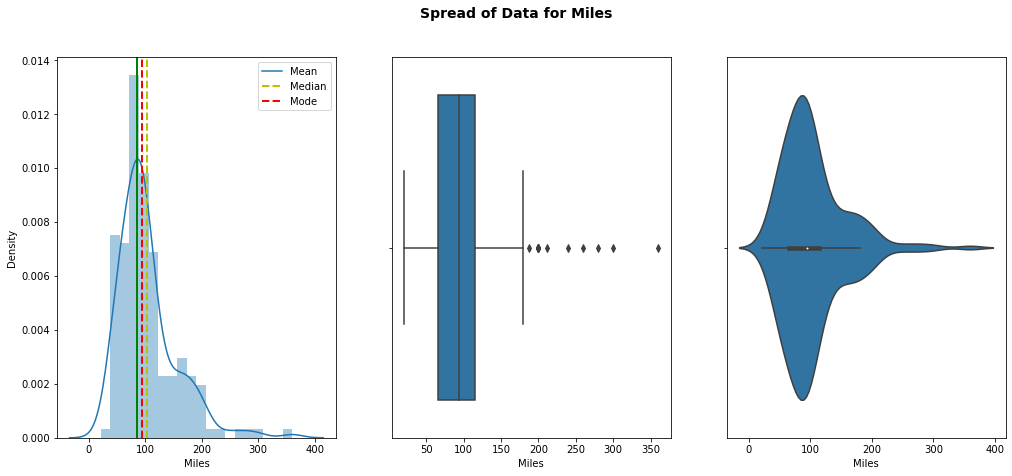

In [24]:
dist_box_violin(data.Miles)

- There are outliers in miles
- Avg of 80 miles per week
- Right skewed

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

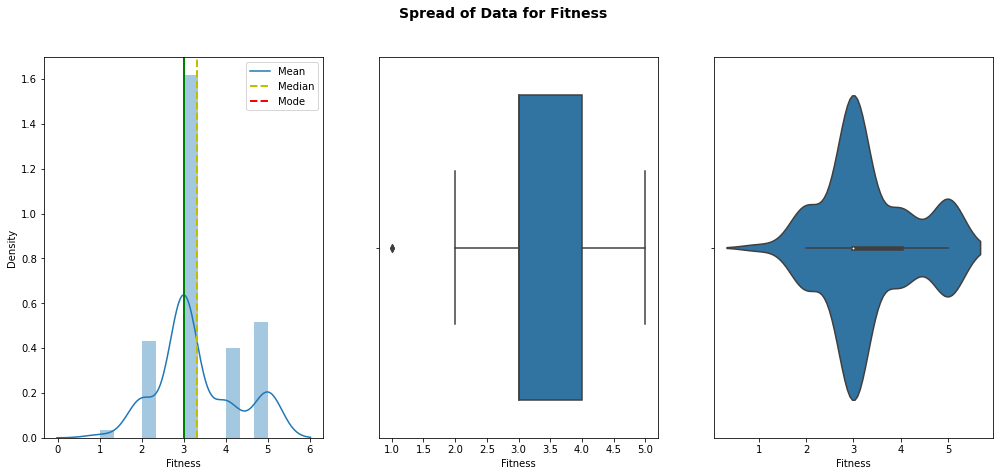

In [25]:
dist_box_violin(data.Fitness)

- Mode is 3 and avg is 3

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

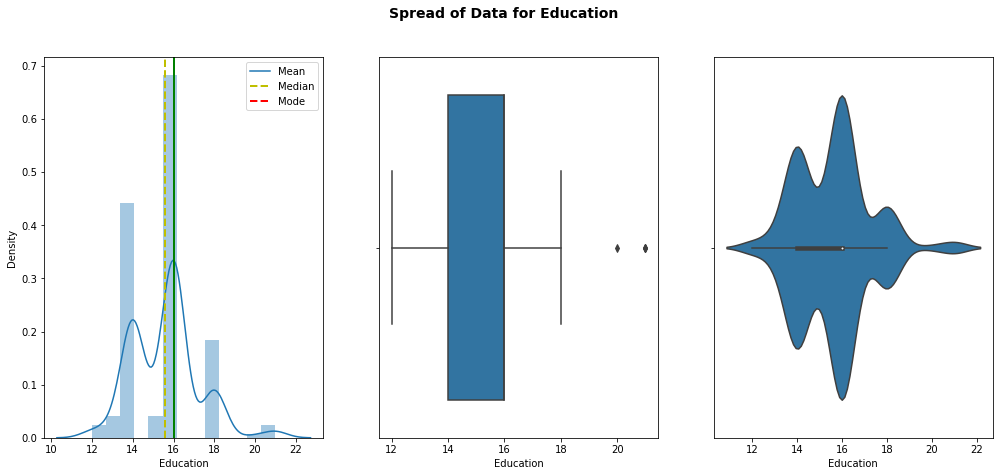

In [26]:
dist_box_violin(data.Education)

- Most customers education in years is between 14 & 16
- Avg is 16
- There are some outliers in Education

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

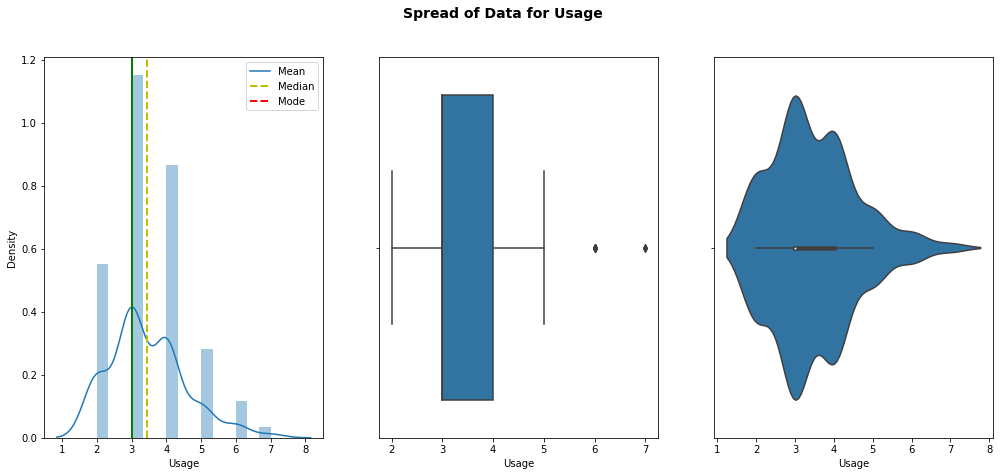

In [27]:
dist_box_violin(data.Usage)

- Avg is 3/week
- Outliers of 6&7/week


## Univariate Categorical Analysis

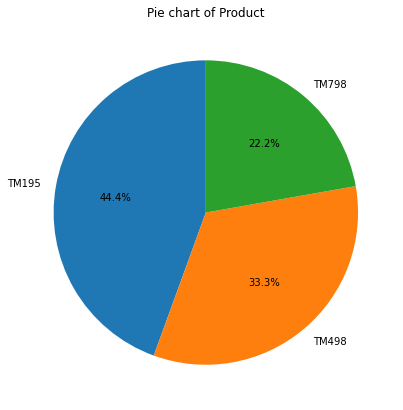

In [28]:
product = data['Product'].value_counts()
plt.figure(figsize=[17,7])
plt.pie(product, startangle=90, autopct='%1.1f%%', labels=product.index);
plt.title('Pie chart of Product');
plt.show()

In [29]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

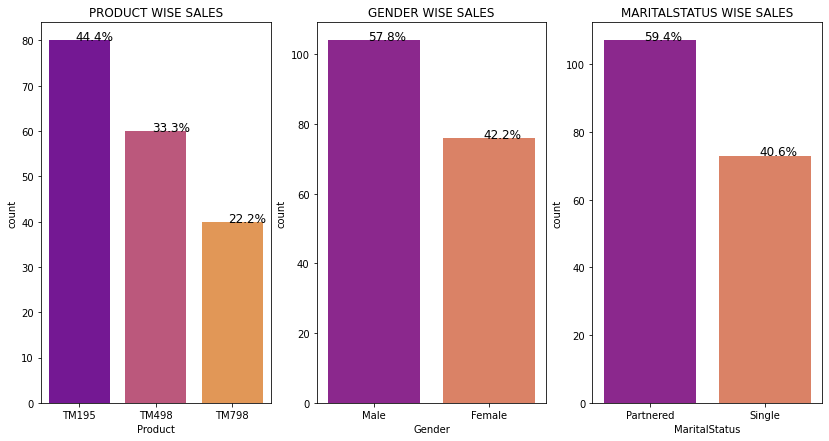

In [30]:
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))
j=0
for i in range(len(category)):
    order = data[category[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=category[i], data=data , order=order,ax=axes1[i],palette='plasma').set(title=category[i].upper() + ' WISE SALES')
    bar_perc(axes1[i],data[category[i]])
    

**Observation:**
- 44.4% customers bought TM195. TM195 model is the most purchased model. TM498 was purchased more than TM798.
- 57.8% male bought Treadmill.There are more Male customers than Female customers.
- 59.4% of the customers who purchased treadmill are Married.

## Bi Variate Analysis

In [31]:
#average age of customer buying each model
data.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

In [32]:
# average income of customers buying each model
data.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

In [33]:
# average miles of customers buying each model
data.groupby('Product')['Miles'].mean()

Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64

In [34]:
# average education of customers buying each model
data.groupby('Product')['Education'].mean()

Product
TM195    15.037500
TM498    15.116667
TM798    17.325000
Name: Education, dtype: float64

In [35]:
# average usage of customers buying each model
data.groupby('Product')['Usage'].mean()

Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64

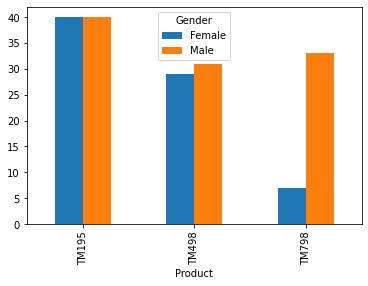

In [36]:
pro_vs_gen = pd.crosstab(data['Product'],data['Gender'])
pro_vs_gen
pro_vs_gen.plot(kind='bar');

- Equal number of gender bought TM195
- Males bought more TM498 & TM798 than females


In [37]:
def uni_cat_viz(data,name=None):
    pro_vs_cat = pd.crosstab(data.Product,data[name])
    print(pro_vs_cat)
    return pro_vs_cat.plot(kind='bar');

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


<AxesSubplot:xlabel='Product'>

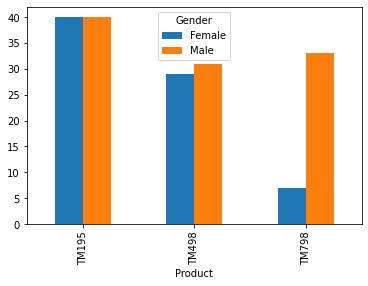

In [38]:
uni_cat_viz(data,'Gender')

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


<AxesSubplot:xlabel='Product'>

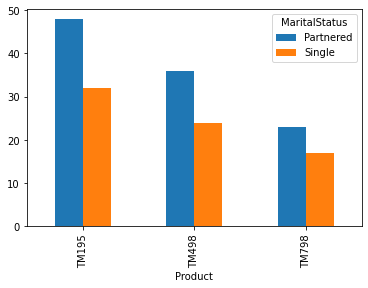

In [39]:
uni_cat_viz(data,'MaritalStatus')

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

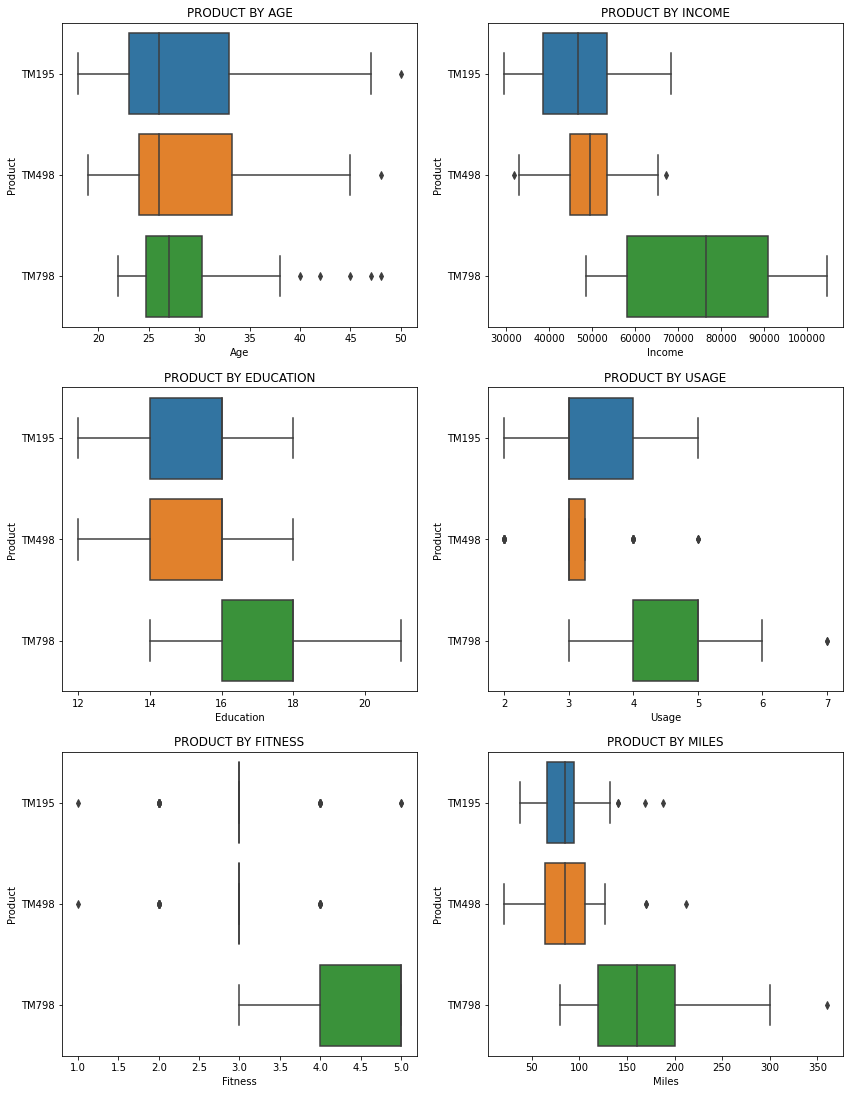

In [40]:
#Bi Varaite Analysis for 
#1.Product & Age
#2.Product & Income
#3.Product & Education
#4.Product & Usage
#5.Product & Fitness
#6.Product & Miles

fig1, axes1 =plt.subplots(3,2,figsize=([14, 19]))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    
    sns.boxplot(data[list1_col[i]],data['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper()  )

- There are several outliers for TM798 from age 40
- Age of customers buying TM195 and TM498 is between 20-35, where as customers buying TM798 are primarily in 25-30
- TM 195 & 498 has the avg age range between 195 & 498 and 798 is 16 to 18
- TM798 run more miles, use more often and seem to be health concious than the other products
- TM798 are bought by customers with high income 
- Partners buy TM195 more than the other products
- Partners buy more of treadmill than single for any product type
- Customers who bought TM498 are expected to use product less frequently

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

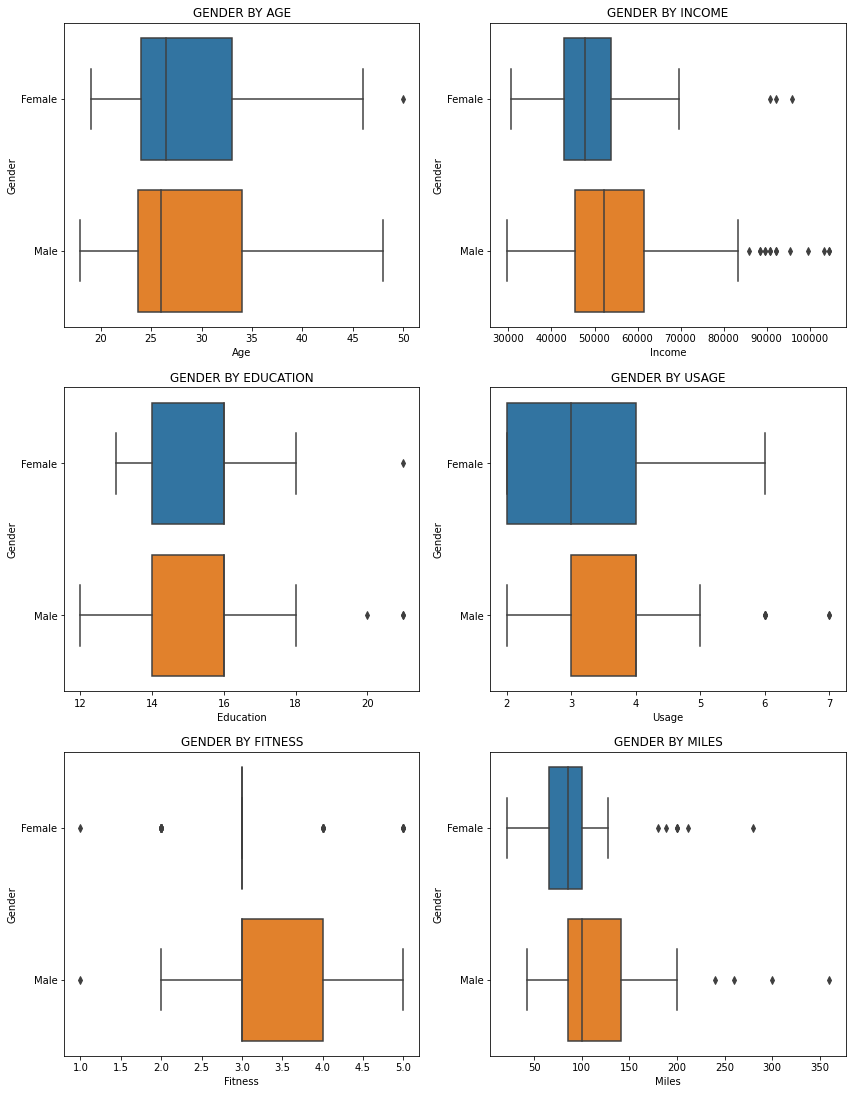

In [41]:
#Bi Varaite Analysis for 
#1.Gender & Age
#2.Gender & Income
#3.Gender & Education
#4.Gender & Usage
#5.Gender & Fitness
#6.Gender & Miles

fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
# to plot graph side by side.
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(data[list1_col[i]],data['Gender'],ax=ax).set(title='GENDER BY ' + list1_col[i].upper()) 


- Males earn more income than females
- Both male and female have equal education frequency
- Males appear to be more fit than females
- Males appear to run more miles and usage than females


/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

<Figure size 504x504 with 0 Axes>

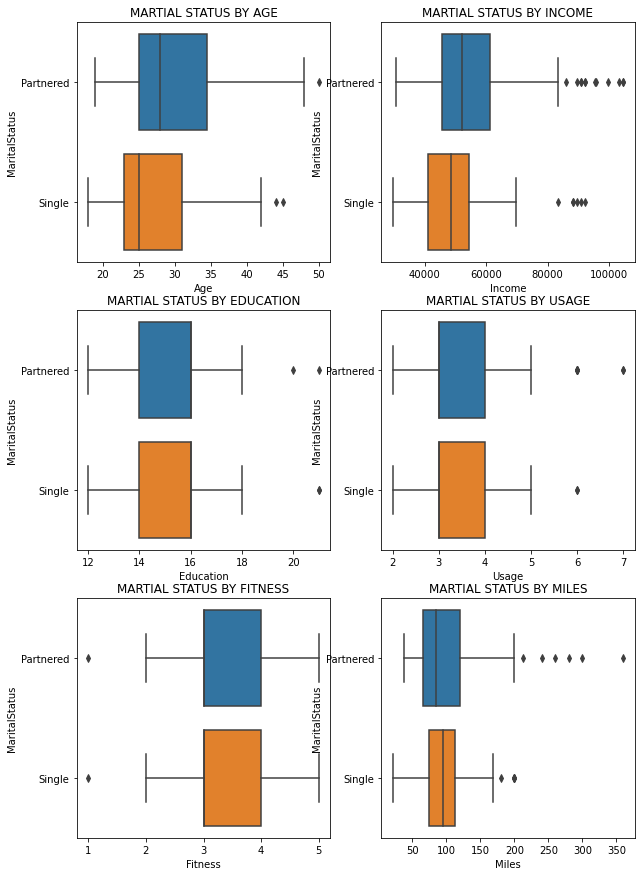

In [42]:
#Bi Varaite Analysis for 
#1.Martial Status & Age
#2.Martial Status & Income
#3.Martial Status & Education
#4.Martial Status & Usage
#5.Martial Status & Fitness
#6.Martial Status & Miles
plt.figure(figsize=(7,7))
fig1, axes1 =plt.subplots(3,2,figsize=(10, 15))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(data[list1_col[i]],data['MaritalStatus'],ax=ax).set(title='MARTIAL STATUS BY ' + list1_col[i].upper())
    

- Paterned customers earn more than single customers
- Paterned customers are expected to run more miles than singles
- Age of Partnered customer is more than Age of single customer

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


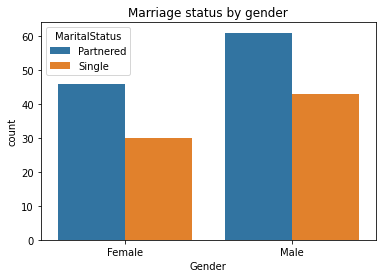

In [43]:
# Marriage status by gender
sns.countplot(data['Gender'], hue=data['MaritalStatus']);
plt.title('Marriage status by gender');

- it's observed that both males and females who are married are more than singles

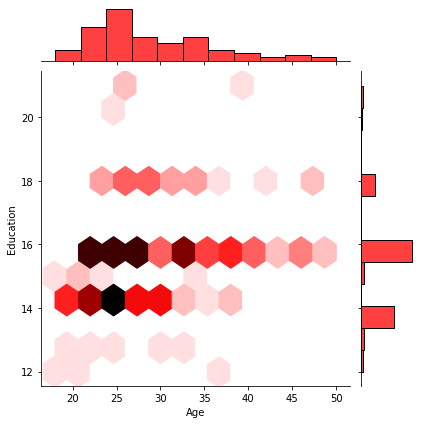

In [44]:
#Bivariate Analysis Age & Education
sns.jointplot(x = 'Age',y = 'Education',data = data,color="red",kind='hex')

- Customer between age 20-40 have 14 -16 years of education

In [45]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

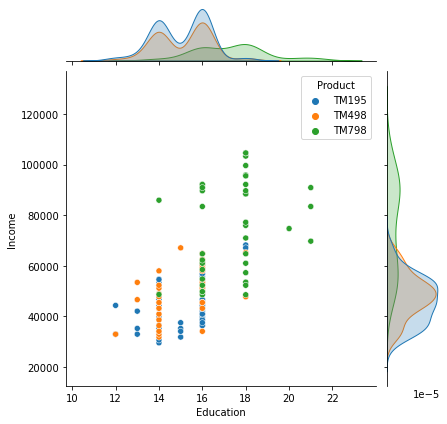

In [46]:
sns.jointplot(y = 'Income',x = 'Education',data = data,color="red",hue='Product')

- Customers bought TM798 more than other products and also have education between 14 and 22 with high income than others

[Text(0.5, 1.0, 'EDUCATION  BY INCOME ')]

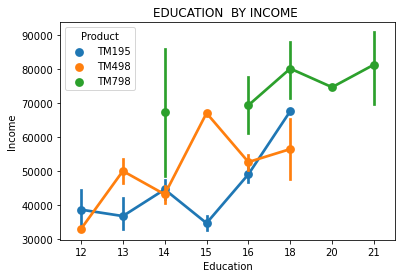

In [47]:
sns.pointplot(x=data["Education"],y=data["Income"],hue=data['Product']).set(title='EDUCATION  BY INCOME ')


[Text(0.5, 1.0, 'EDUCATION  BY INCOME ')]

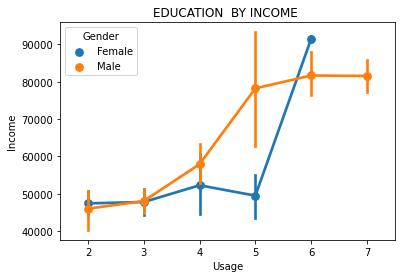

In [48]:
sns.pointplot(x=data["Usage"],y=data["Income"],hue=data['Gender']).set(title='EDUCATION  BY INCOME ')


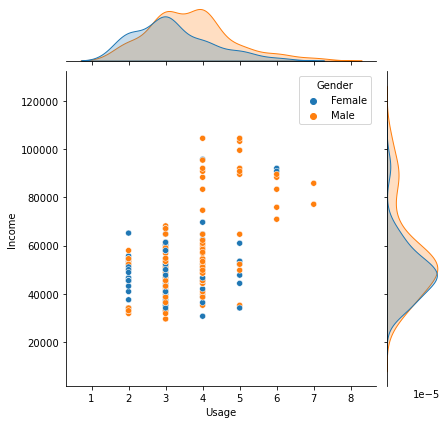

In [49]:
sns.jointplot(x='Usage',y='Income',data=data, hue='Gender')

- males earn more and are expected to use threadmill avg 4 -7/week

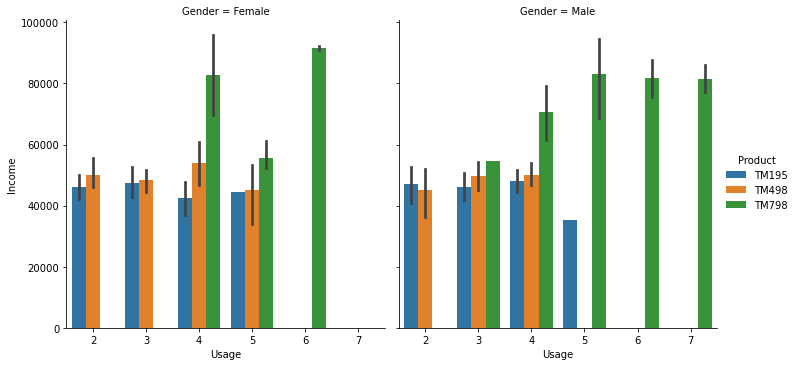

In [50]:
sns.catplot(x='Usage',y='Income',data=data, kind='bar', col='Gender', hue='Product')

- males earn more and are expected to use threadmill avg 4 -7/week, they also bought TM798 the most
- customers who bought TM195 and TM498 have almost the same income and expected to use treadmill avg 2-4

In [55]:
prod_mari_gender = pd.crosstab(index=data['Product'], columns=[data['MaritalStatus'],data['Gender']])
# prod_mari_gender_sum = list(prod_mari_gender.sum().values)
# prod_mari_gender_sum_df = pd.DataFrame({'SUM':prod_mari_gender_sum},columns=['(Partnered, Female)','(Partnered, Male)','(Single, Female)','(Single, Male)'
# ])
# prod_mari_gender_sum_df
# # pd.concat([prod_mari_gender,prod_mari_gender_sum_df],axis=1)

In [52]:
prod_mari_gender.sum()

NameError: name 'prod_mari_gender' is not defined

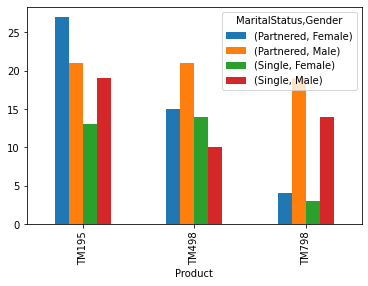

In [57]:
prod_mari_gender.plot(kind='bar');

- Partnered females bought TM195 the most
- Single male bought more TM195 than any single male
- Single female bought more TM498  than any single female

(20000.0, 100000.0)

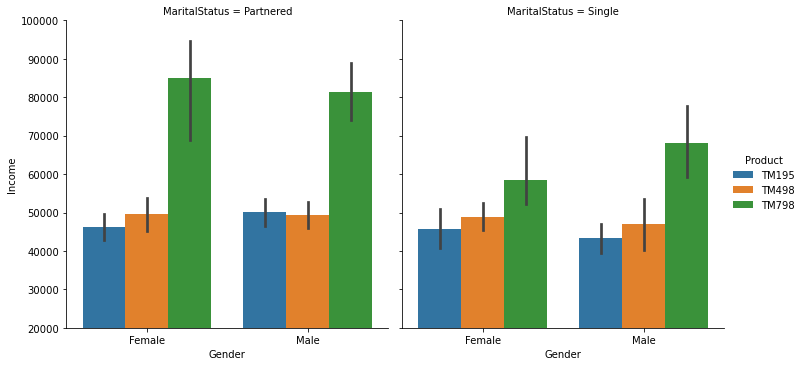

In [58]:
sns.catplot(x='Gender',y='Income',data=data, kind='bar', col='MaritalStatus', hue='Product');
plt.ylim(20000,100000)

- both patnered male and female earn higher and bought TM798 the most
- high earning singles bought TM798 the most
- TM498 is the next bought by  middle earning singles
- Men dominated in both marital status

In [59]:
pd.crosstab(index=data['Product'],columns=[data['Gender'],data['Fitness']])

Gender  Female               Male              
Fitness      1   2   3  4  5    1  2   3  4   5
Product                                        
TM195        0  10  26  3  1    1  4  28  6   1
TM498        1   6  18  4  0    0  6  21  4   0
TM798        0   0   1  1  5    0  0   3  6  24

- Both females and males bought TM195 with fitness of 3

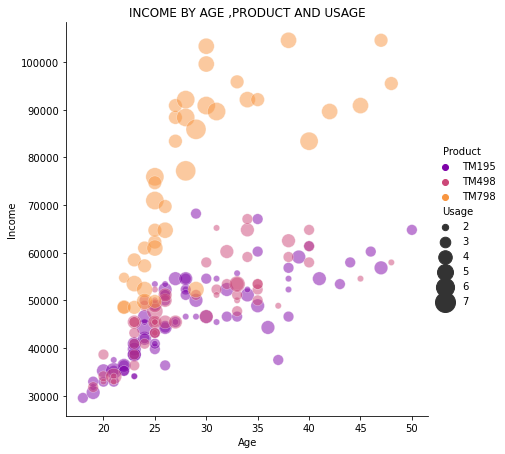

In [60]:
#scatter plot between income, age ,product and usage
sns.relplot(x="Age", y="Income", hue="Product", size="Usage",
            sizes=(40, 400), alpha=.5, palette="plasma",
            height=6, data=data).set(title='INCOME BY AGE ,PRODUCT AND USAGE');

- TM195,TM498 are bought by customers with income below 70k and concentrated age range between 23-35
- Customers who bought TM798 have high income above 70k and age range between 23-30
- Most customers who bought TM798 are expected to use the treadmill more often


# Conclusion

- 44.4% customers bought TM195 making it the most bought model by all gender amongst the other models
- TM498 is the second most bought model
- 57.8% male customers bought treadmill. Males bought more treadmills than females
- 59.4% of the customers are married. Married customers bought more treadmills than single customers
- Males are expected to use treadmill more than females
- Most of the customers are in lower pay range and earn less than 70K.   
- Average Education is 16 and median is 18.

# Customer Profiles of Models

### TM195

- 44.4% customers bought TM195 making it the most bought model by all gender amongst the other models
- Average income for customers who bought this product is around 46k. All customers who bought this product earn less than 68k with the median of 46k
- Average age is 28 and median 26
- Average education years is 15 and median is 16 (this could identity as bachelors)
- Average usage is 3. Expected to be used 3-4 times a week
- Average miles is 82 and median is 85

This product topped the sales with 44% cus these customers earn below 68k and is affordable. This product is mostly used by young customers between 18 and 30. Also married customers purchased this the most, however single men bought more than female. Customers fitness is around 3 which points out the fact that they want to get something basic to help them get in shape as they intend to use the treadmill roughly 3 times a week.

### TM498
- 33.3% customers bought this product. Making it the second most purchased product amongst the other products
- Average income for customers who bought this product is around 48k. All customers who bought this product earn less than 67k with the median of 49k
- Average age is 28 and median 26
- Average education years is 15 and median is 16 (this could identity as bachelors)
- Average usage is 3. Expected to be used 3-4 times a week
- Average miles is 87 and median is 85. They intend to run more miles as compared to TM195

This product share roughly the same income with the TM195 customers. Single ladies bought this more than single males, this can be due to a special feature or design that best suits the females than the males. Customers are expected to run more miles but insignificantly use lesser times as week as compared to TM195.

### TM798
- 22.2% customers bought this product. Making it the least purchased product amongst the other products
- Average income for customers who bought this product is around 75k. All customers who bought this product earn less than 100k with the median of 76k
- Average age is 29 and median 27
- Average education years is 17 and median is 18 (this could identity as masters/professional cert)
- Average usage is 3. Expected to be used 4-7 times a week
- Average miles is 87 and median is 85. They intend to run more miles as compared to TM195

This product is bought by high earning customers.This might identity the product as an expensive product as compared to the other producsts. Married partners bought this the most.
Customers are expected to run more miles and use more (3-5) as compared to other models and its customers. These customers are rated 4-6 in fitness, indiicating how atheletic customers who bought this model might be.
The aforementioned can be as a result of a unique features specific to this model only



## Recommendations:
- TM195 & TM498 attracts people with income less than 60k , may be because of cost of both models. We should market these models as a budget Treadmill for all.
- TM798 should be marketed as a high end Treadmill for professionals and athletes. Create a luxiurous brand image for this Treadmill.
- Assuming TM 798 provides high margin of profit, we should brand it as Treadmill for athletes. We can also endorse some athlete to promote this Treadmill. This might increase there sales.
- Considering above observations, We can attract customers to upgrade from their existing treadmill and switch to TM798 ,highlighting extra features this Treadmill provide
- To expand our sales with Female customers, We could run a marketing campaign during Women's days, Mothers days emphasizing on fitness and exercise.

In [96]:
data[data.Product == 'TM798']['Age'].describe()

count    40.000000
mean     29.100000
std       6.971738
min      22.000000
25%      24.750000
50%      27.000000
75%      30.250000
max      48.000000
Name: Age, dtype: float64

In [98]:
from pandas_profiling import ProfileReport 

In [103]:
ProfileReport(data, title='Pandas Profiling Report',html={'style':{'full_width':True}})

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB
